<a href="https://colab.research.google.com/github/philipoladimeji/ITNPBD4-Portfolio/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration

Predict Hotel Demands: Leveraging Time Series Forecasting Techniques



A Comparison of ARIMA, Phrophet, LSTM & Pick-up Method

Hotel demand forecasting plays a vital role in hotel revenue management. It entails predicting the number of room bookings and occupancy rates for a specific period. These forecasts enable hotel managers to optimize pricing and inventory strategies, maximizing revenue potential.

One prominent pattern utilized in demand prediction is hotel advance bookings. Accurate forecasting models encompass a range of approaches, from simple statistical methods to more advanced machine learning models like neural networks.

I use a set of four distinct forecasting models to make predictions about hotel demands based on historical booking data.

To streamline the analysis process, Part of what is focus on is the booking demand for the resort hotel and create a time series dataset where booking numbers are grouped according to the arrival date.

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 25.7 MB/s eta 0:00:00


In [3]:
# For proper analysing it will be required to import some essential machine learning libraries to enable efficient data handling, data
#visualization and analysis without writing the required code from the beginning. Libraries like pandas which is use to analyse, manipulte and
#clean data using dataframe. numpy is use to support numerical and mathematical operations. CSV enables reading and writing of files.
#matplotlib.pyplot is for creating charts and graphs for visualisations. seaborn is built on matplotlib for improved colour schemes and styles.

#Importing pandas library
import pandas as pd
#Importing numpy library for numerical operations
import numpy as np
#Importing csv library to enable reading and writing of files
import csv
#Importing matplotlib.pyplot to customise and create visualisations from data
import matplotlib.pyplot as plt
#Importing seaborn to make visualisation informative and improve colour schmes and styles
import seaborn as sns
#plotly.graph_objects is use to build fully customizable, interactive visualizations
import plotly.graph_objects as go
#plotly.express provides a quick and high-level interface for creating fine interactive visualizations with minimal code
import plotly.express as px
#Datetime allows easy dates and time-based calculations
import datetime
#Importing the ugmented Dickey–Fuller test to check if a time series is stationary
from statsmodels.tsa.stattools import adfuller
#Importing the ARIMA model used for forecasting time series data that contains autocorrelation
from statsmodels.tsa.arima.model import ARIMA
#Importing metric used in measuring how predicted values deviate from actual values in regression and forecasting
from sklearn.metrics import mean_squared_error
#Importing a tool that choose best ARIMA/SARIMA model and tuning its parameters
from pmdarima import auto_arima
#It control or suppresses warning messages
import warnings
#Importing a metric that measures forecasting error as a percentage and shows range of predictions from actual values
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
#Getting the file path and saving it in the working directory
from google.colab import files
uploaded = files.upload

In [5]:
#Reading the data and displaying the top five rows of the data
df = pd.read_csv("/content/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#Getting the statistical summary of all numeric columns in the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
#Getting detailed summary of the data like column names, datatypes, number of non-null values if there is, and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#Getting the list of columns in the data
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
#Getting the dimension of my data and returning the number of rows and columns
df.shape

(119390, 32)

Data Validation

In [12]:
#The double quotation checks for empty strings in the given data frame. It replaces with nan (not a number) which is pandas method of representing
#missing values. The inplace=True as seen implies the adjustment is done directly in the dataframe. The isnull finds the missing values for an
#array lookalike object in the cell and the dot sum count the number of missing value for each columns if there is

#Checking for missing value in data and print the total number of missing values on each
df.replace('', np.nan, inplace=True)

#Output the number of missing values on each column if it's available
df.isnull().head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


/tmp/ipython-input-1233731822.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="YlOrRd")


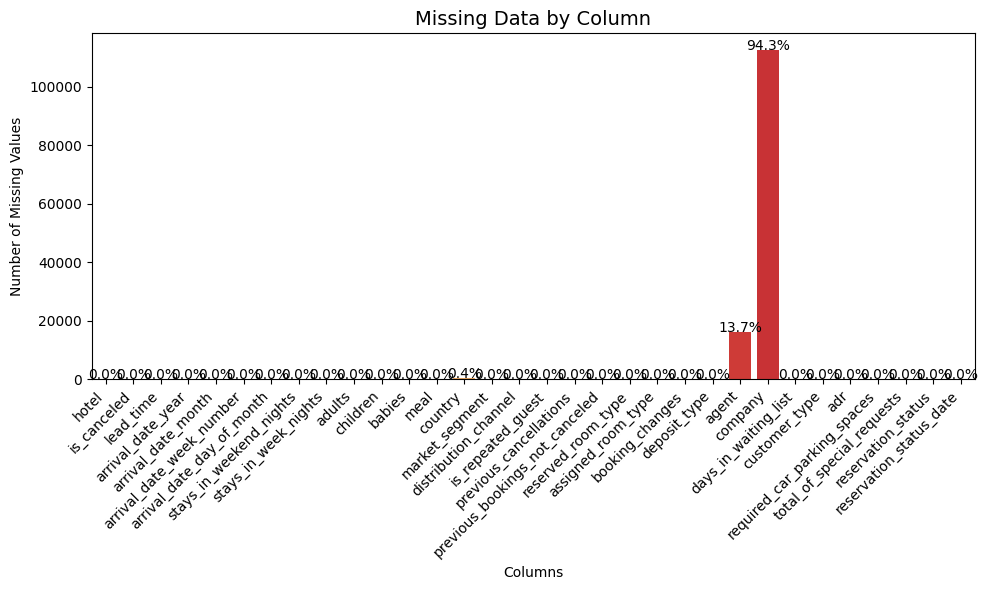

In [13]:
#Looping through the column and count the missing values
missing_values = df.isnull().sum()
total_rows = len(df)

#Getting the plot in a bar chart form to display the missing values in each columns
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="YlOrRd")

#Including percentages on each bar
for i, value in enumerate(missing_values.values):
    percent = (value / total_rows) * 100
    ax.text(i, value + 0.5, f"{percent:.1f}%", ha='center', fontsize=10)

#The rotation and the label words makes the plot easy to understand
plt.title("Missing Data by Column", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [14]:
#This takes off unnecessary columns, dropping the rows with missing values in key fields, resetting the index, and return the first 5 rows of data
df = df.drop(['company', 'agent'], axis=1)
df = df.dropna(subset=['country', 'children', 'arrival_date_week_number'], axis=0)
df = df.reset_index(drop=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
#This changes the children column to integers and verify its datatype
df['children'] = df['children'].astype(int)
df['children'].dtype

dtype('int64')

In [16]:
#Returning the number of missing values in each columns
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Data Visualizations

In [17]:
#This is an dynamic world map which shows the number of country records in the data, indicating frequency
#using color intensity
country_frequency_record = df['country'].value_counts().to_frame()
country_frequency_record.columns = ['count']
fig = px.choropleth(country_frequency_record, color='count',
                    locations=country_frequency_record.index,
                    hover_name=country_frequency_record.index,
                    color_continuous_scale=px.colors.sequential.Teal)
fig.update_traces(marker=dict(line=dict(color='blue', width=1)))
fig.update_layout(title_text='Number of Country Records',
                  title_x=0.5, title_font=dict(size=17))
fig.show()

From the above map visualization, It is seen that most of the customers are coming from the Europe region especially Portuguese.

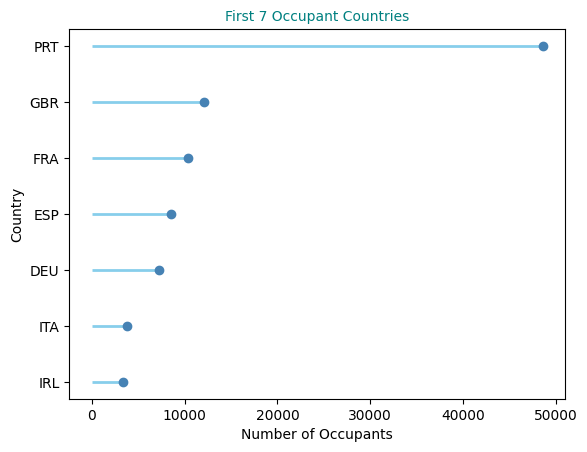

In [18]:
#This display the top 7 countries by number of occupants in a clean horizontal chart
top_countries = df['country'].value_counts().head(7).sort_values()

plt.hlines(y=top_countries.index, xmin=0, xmax=top_countries.values, colors='skyblue', linewidth=2)
plt.plot(top_countries.values, top_countries.index, 'o', color='steelblue')

plt.title("First 7 Occupant Countries", fontsize=10, color='teal')
plt.xlabel("Number of Occupants")
plt.ylabel("Country")
plt.show();

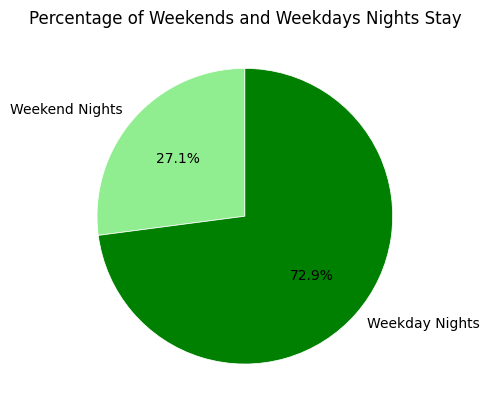

In [20]:
#Sum the total stayed nights and plot a pie chart
overall_weekend_nights = df['stays_in_weekend_nights'].sum()
overall_week_nights = df['stays_in_week_nights'].sum()

total_nights = [overall_weekend_nights, overall_week_nights]
labels = ['Weekend Nights', 'Weekday Nights']
colors = ['#90ee90', '#008000']

plt.pie(total_nights, labels=labels, wedgeprops={'linewidth': 0.55, 'edgecolor': 'white'},
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Percentage of Weekends and Weekdays Nights Stay")
plt.show();

To streamline the process of the analysis, I specifically focus on the booking demand for the resort hotel and create a time series dataset where booking numbers are grouped according to the arrival date.

In [16]:
#This makes a time series data of the daily Resort Hotel bookings that were not canceled and ready for
#forecasting models such as ARIMA or Prophet.
import pandas as pd
df = pd.read_csv("/content/hotel_bookings.csv")\
    .rename(columns={'arrival_date_year':'year','arrival_date_month':'month',
                     'arrival_date_day_of_month':'day'})


def monthToNum(shortMonth):
    return {
            'January': 1,
            'February': 2,
            'March': 3,
            'April': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'August': 8,
            'September': 9,
            'October': 10,
            'November': 11,
            'December': 12
    }[shortMonth]

df['month'] = df['month'].apply(monthToNum)
df['date']= pd.to_datetime(df[["year", "month", "day"]])

#fileter data for resort hotel and remove cancelations
df = df[(df['is_canceled']==0) & (df['hotel']=='Resort Hotel')]
t_df = df.groupby(['date'])['hotel'].count().reset_index()\
         .rename(columns={'hotel':'y','date':'ds'})

In [17]:
#Import plotly.express as px

fig = px.line(t_df, x="ds", y="y", title='Hotel Demands')
fig.update_layout(
    title_x=0.5
)
fig.show()

In order to assess the effectiveness of each forecasting method, A training period of 25 months is allocated, followed by a test period of 1 month specifically in August 2017.

In [18]:
#Choose the  rows where the date begins from July 1, 2015, up to July 31 2017 as the train set and
#August 1 to August 31, 2017 as test set
train_df = t_df.loc[(t_df['ds']>='2015-07-01') & (t_df['ds']<'2017-08-01')]
test_df = t_df.loc[(t_df['ds']>='2017-08-01') & (t_df['ds']<'2017-09-01')]

Mean Absolute Error (MAE) is used as a measure of the average error across the entire sequence, but it is good to know it does not capture the temporal or structural dependencies within the sequence. Mean Squared Error (MSE) can also be used with its focus on penalizing large errors.

Step 1: ARIMA

ARIMA (Auto Regressive Integrated Moving Average) is one of the most common models for stationary time series and is widely used for short-term forecasting. ARIMA(p,d,q) is a model that joins a simple combination of Auto Regression and Moving Average model. Auto Regression uses past values to make a prediction while Moving Average uses past errors to make a prediction.

Where: p indicates the number of Autoregressive time lag terms in the model.

d indicates  the number of differentiations applied to the time series values.

q indicates the number of Moving Average time lag terms in the model.

Initially, I employ a technique known as time series decomposition to break down my time series into three distinct elements which are: trend, seasonality, and noise. However, during my analysis, I did not observe a noticeable trend but I can see weekly seasonality within the data.

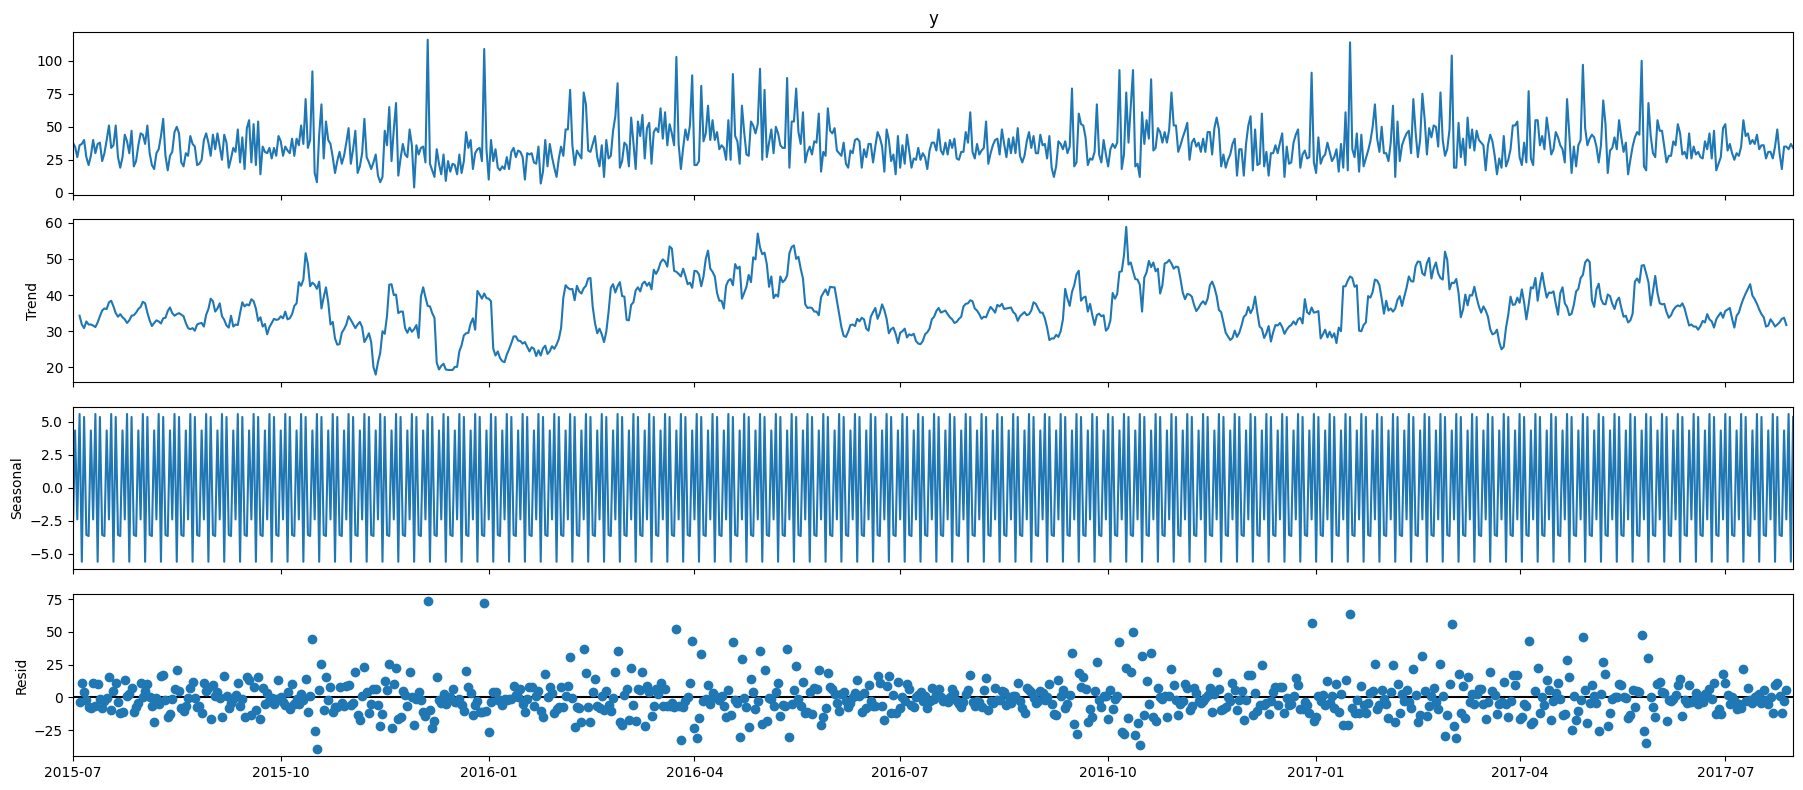

In [19]:
#This divide the Resort Hotel bookings time series into trend, seasonal, and residual parts to get clarity
#on the underlying patterns before forecasting with ARIMA models.
from pylab import rcParams
import statsmodels.api as sm

train_df_arima = train_df.copy()
train_df_arima = train_df_arima.set_index('ds')

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train_df_arima['y'],
                                          model='additive')
fig = decomposition.plot()
plt.show()

To initiate the construction of an ARIMA model, the initial step involves determining the appropriate value for the differencing parameter (d) by assessing the stationarity of the dataset. In this case, the Augmented Dickey-Fuller (ADF) test yields a small p-value (<0.05), indicating that the time series data does not necessitate differencing.

In [20]:
#This check if the Resort Hotel bookings time series is stationary which is crucial for ARIMA modeling.
# Explanations:If p-value < 0.05 means series is likely stationary and
#p-value ≥ 0.05 means series it's non-stationary which might need differencing

from statsmodels.tsa.stattools import adfuller
from numpy import log

train_df_arima = train_df.copy()
train_df_arima.set_index('ds', inplace=True)
result = adfuller(train_df_arima['y'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.555954951696751
p-value: 0.00015559448784235356


Even though partial autocorrelation function (PACF) and Autocorrelation function (ACF) plots can be used to identify p and q, it is often difficult to read the plots. Thus, I utilize the auto_arima function to automatically determine the optimal (p, d, q) values with m parameter to be 52 (weekly ) as the number of observations per seasonal cycle. After applying this approach, the minimum AIC is achieved with ARIMA(2,0,2)(2,1,0)[52].

In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(train_df_arima['y'],seasonal=True,m=12, D=1,
                          trace=True, error_action='ignore',
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=18.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6766.805, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6546.565, Time=1.95 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.64 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6764.805, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6768.679, Time=0.32 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6503.587, Time=3.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6501.666, Time=4.89 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=6544.568, Time=1.61 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.61 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6503.584, Time=3.15 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  762
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood               -3246.834
Date:                  Wed, 10 Dec 2025   AIC                           6499.668
Time:                          20:59:22   BIC                           6513.528
Sample:                      07-01-2015   HQIC                          6505.008
                           - 07-31-2017                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6297      0.032    -19.930      0.000      -0.692      -0.568
ar.S.L24      -0.2401      0.034     -7.097      0.000      -0.306      -0.174
sigma2       334.8400     11.476     29.178      0.000     312.348     357.332
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               305.40
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.90
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Consequently, I utilize ARIMA(2,0,2)(2,1,0)[12] order to construct the ARIMA model, leveraging its superior performance based on the AIC criterion.

In [22]:
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(train_df_arima['y'],order=(2,0,2),\
                         seasonal_order=(2,1,0,12))

results = mod.fit()

The next thing is for me to proceed to validate the ARIMA model by predicting the outcomes for a period of 31 days in August 2017. The Mean Absolute Error (MAE) for this validation is computed to be 8.

Text(0, 0.5, 'Bookings')

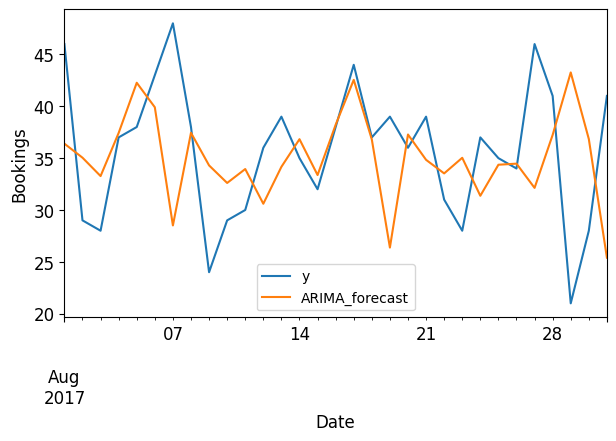

In [23]:
pred= pd.DataFrame(results.forecast(steps=31)).reset_index()
test_output = test_df.merge(pred,left_on='ds', right_on='index', how='inner').reset_index()
test_output = test_output.rename(columns={'predicted_mean':'ARIMA_forecast'})
test_output_viz = test_output[['ds','y','ARIMA_forecast']]
test_output_viz= test_output_viz.set_index('ds')

test_output_viz.plot.line(figsize=(7,4),fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

In [24]:
from sklearn.metrics import mean_absolute_error
print('Time Series: {:.0f}'.format(mean_absolute_error\
(test_output[['ARIMA_forecast']],test_output[['y']])))

Time Series: 6


Step 2: Prophet
It's a time series forecasting model developed by Facebook that uses a decomposable time series model to capture trends, seasonality, and holidays in the data. It is not necessary to do differencing when using Prophet for time series forecasting. Prophet is designed to handle non-stationary time series data with trends and seasonality.

The next step for me is to construct a Prophet model and utilize it to make predictions for a 31-day period in August 2017. After utilizing the original training time series, the resulting predictions are added to the line chart for visualization.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


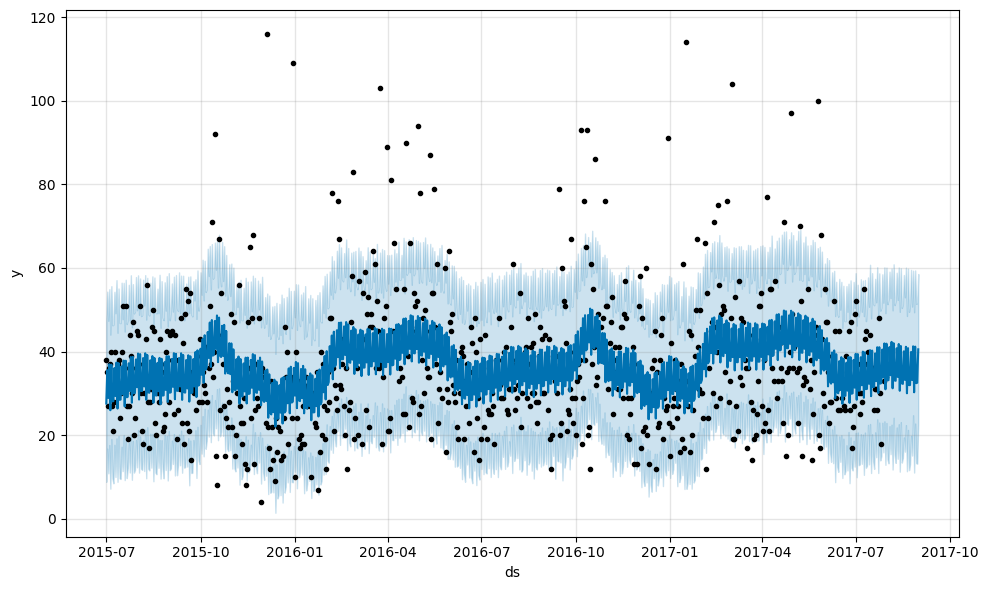

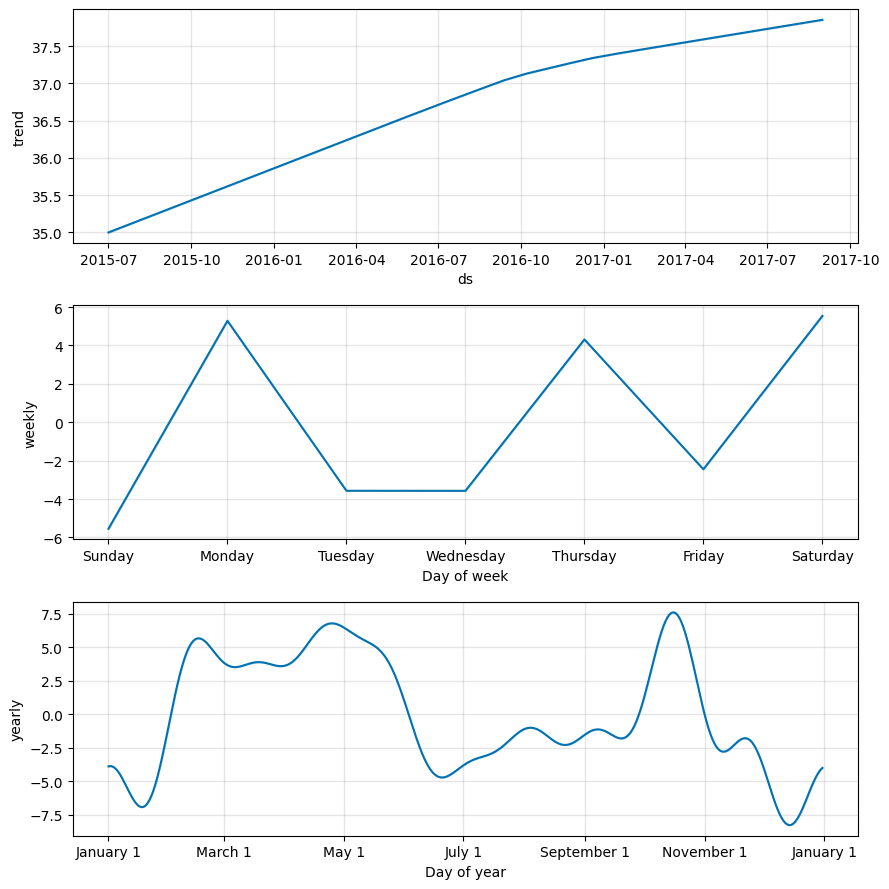

In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

train_df_prophet = train_df.copy()
model = Prophet(weekly_seasonality=True)
model.fit(train_df_prophet)
forecast = model.make_future_dataframe(periods=31)
pred = model.predict(forecast)

#plots
prophet_plot = model.plot(pred)

prophet_plot2 = model.plot_components(pred)

Upon analyzing the component breakdowns of the Prophet model, several noteworthy patterns emerge. Firstly, the model reveals an upward trend, indicating a general increase over time. Additionally, it identifies peaks occurring specifically on Mondays and Thursdays, suggesting higher demand on these particular days.

Moreover, when examining the yearly graph, two distinct peaks are detected. The first peak is observed between February and May, while the second peak occurs in October.

So, I'll proceed to validate the forecast generated by the Prophet model by comparing it to the actual numbers recorded in August 2017. The Mean Absolute Error (MAE) for this validation is calculated to be 6.

Text(0, 0.5, 'Bookings')

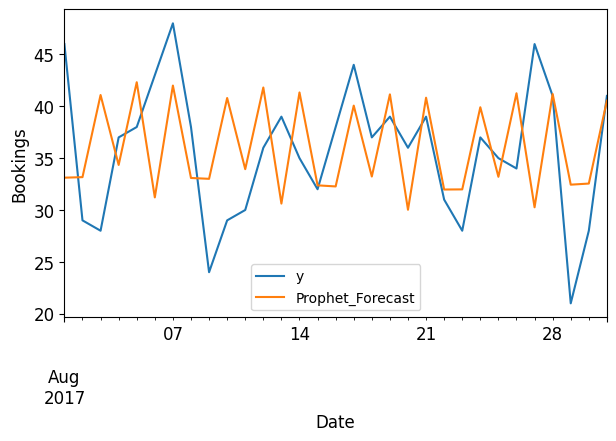

In [26]:
forecast_df = test_df.merge(pred,left_on='ds', right_on='ds', how='inner')\
.rename(columns={'yhat':'Prophet_Forecast'})

test_output_viz = forecast_df[['ds','y','Prophet_Forecast']]
test_output_viz= test_output_viz.set_index('ds')

test_output_viz.plot.line(figsize=(7,4),fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

In [27]:
from sklearn.metrics import mean_absolute_error
print('Time Series: {:.0f}'.format(mean_absolute_error\
(forecast_df[['Prophet_Forecast']], forecast_df[['y']])))

Time Series: 6


Step 3: Long Short-Term Memory (LSTM)

LSTM is an advanced type of Recurrent Neural Network which is also known as RNN specifically designed to address the vanishing gradient problem. By incorporating a memory cell that retains information over time, LSTM effectively captures temporal dependencies. It employs three gates (input, output, and forget) to control the flow of information in and out of the memory cell. This selective process of remembering or forgetting past information, coupled with updates based on new input, allows LSTM to capture and leverage long-term dependencies in the data.

To start LSTM analysis, I'll start with constructing time series data.

In [28]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    #Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    #Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    #Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    #Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    #Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

#Parameters
window_size = 31
batch_size = 32
shuffle_buffer_size = 1000

#Generate the dataset windows
x_train= train_df[['y']]
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

I use Keras framework to build the LSTM model. The lambda function expands the dimensions of the input tensor by adding an extra dimension at the end (axis=-1). The input shape argument specifies the shape of the input data, which is set to [window_size].

The Bidirectional layer creates two parallel LSTM layers, one processing the input sequence in the forward direction and the other in the backward direction. This allows the model to capture information from both directions.

LSTM uses tanh by default and that has an output range of [-1,1]. Another Lambda() layer will have to be used to scale the output by 100 before it adjusts the layer weights.

In [29]:
import tensorflow as tf
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 16.8646 - mae: 17.3529
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 11.5655 - mae: 12.0582
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 11.5026 - mae: 11.9906
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 10.4195 - mae: 10.9018
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 11.8511 - mae: 12.3418
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 11.0039 - mae: 11.4914
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 11.5241 - mae: 12.0119
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 11.2767 - mae: 11.7677
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 10.9311 - mae: 11.4239
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 10.9234 - mae: 11.4173
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 10.7435 - mae: 11.2315
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 11.5821 - mae: 12.06

**Predictions**

The next step is to get my predictions for August 2017.

In [30]:
split_time = len(train_df)
series = t_df['y'].values

# Initialize a list
forecast = []

forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  print(time)
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
24
1/1 ━━━━━━━━━━━━━━━━━━

The next is for me to compare my predictions with the actual values. Upon evaluating the performance of the LSTM model, the Mean Absolute Error (MAE) is calculated to be 5.

Text(0, 0.5, 'Bookings')

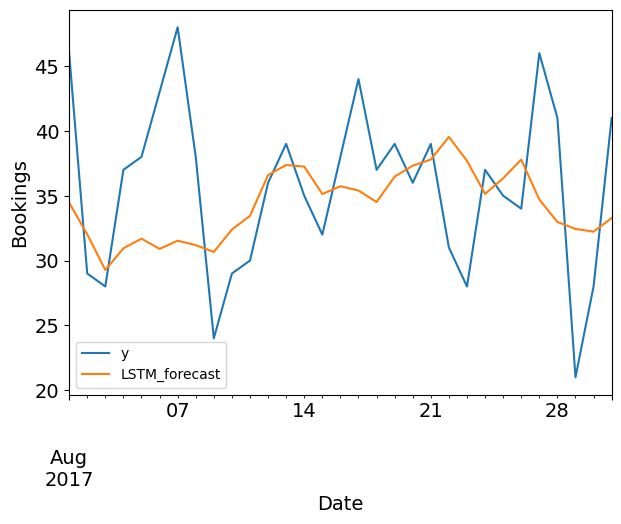

In [31]:
#Create a NumPy datetime array
dates = pd.date_range('2017-08-01', periods=31, freq='D')
dates
#Convert to an index
idx = pd.DatetimeIndex(dates)

results_df = pd.DataFrame(results,idx,['y'])
test_df.set_index('ds', inplace=True)

test_df_LSTM2 = test_df.copy()
test_df_LSTM2['LSTM_forecast'] = results_df[['y']]
test_df_LSTM2.plot(figsize=(7,5), fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Bookings', fontsize=14)

In [32]:
LSTM_forecast = test_df_LSTM2[['LSTM_forecast']]

In [33]:
test_df_LSTM2.columns

Index(['y', 'LSTM_forecast'], dtype='object')

In [34]:
from sklearn.metrics import mean_absolute_error
print('Time Series: {:.0f}'.format(mean_absolute_error\
(test_df_LSTM2[['LSTM_forecast']], test_df_LSTM2[['y']])))

Time Series: 6


Step 4
Pick-up models are popular in the hotel industry because they leverage the unique attributes of reservations throughout the booking window. These models effectively utilize reserved booking data, setting them apart from other methods discussed earlier.

In this analysis, we illustrate the additive pick-up approach, where the final demand forecast is calculated as the sum of current bookings and the average pick-up between the present day and the target day. Alternatively, you can also use the multiplicative approach, which assumes that current bookings are proportional to the final arrivals.

Key terms related to additive pick-up models are as follows:

Booking lead time: The number of days between a specific date and the arrival date.
On-the-books reservations: Reserved bookings present for a particular date.
Number picked up: Additional reservations received from the current date until the arrival date. The historical average of this value is known as the average pick-up.
Pick-up forecast: The sum of on-the-books reservations and the average pick-up.










**To cite an example, on the 1st of March 2022, there are 350 on the reservation book for April 1st, and the final reservations on April 1st amount to 450. The booking lead time in this case is 31 days, resulting in an average pick up of 100 over that period. On March 1st, 2023, there are 300 on the reservation book for April 1st, 2023. Therefore, the forecast for March 1st, 2023, is 400 [300 reservations + 100 pick-up]**

To initiate the analysis, I'll construct a dataframe that includes the cumulative sum of bookings grouped by the lead time for each arrival date. This arrangement enables me to observe the accumulation of hotel demands over time for various arrival dates.

In [35]:
#treat all bookings 365 days ago as 365 days
df['lead_time2'] = np.where(df["lead_time"] >365,365, df["lead_time"])

train_matrix = df.loc[df['date']<'2017-08-01']\
                 .groupby(['date','lead_time2'])['hotel'].count().reset_index()
train_matrix = train_matrix.sort_values(['date', 'lead_time2'],
                                          ascending=[True, False])

train_matrix['bookings_cumsum'] = train_matrix.groupby(['date'])['hotel']\
                                              .transform(pd.Series.cumsum)
train_matrix = train_matrix.rename(columns={'hotel':'bookings'})
train_matrix

,date,lead_time2,bookings,bookings_cumsum
27,2015-07-01,365,1,1
26,2015-07-01,342,1,2
25,2015-07-01,181,1,3
24,2015-07-01,149,2,5
23,2015-07-01,145,1,6
...,...,...,...,...
15201,2017-07-31,23,1,28
15200,2017-07-31,22,2,30
15199,2017-07-31,5,1,31
15198,2017-07-31,1,2,33


Because of the unavailability of reserved bookings for every single day across the entire lead time range (0–365 days) leading up to each arrival date, I'll construct a lookup date dataframe specifically for the purpose of backfilling the missing data.

In [36]:
date_index = df.groupby("date")['hotel'].count().reset_index()
date_index['max'] = 365
date_index['min'] = 0
date_index = date_index.loc[date_index.index.repeat(date_index['max']\
                                        .sub(date_index['min']) + 1)]
date_index['lead_time'] = date_index['min'].add(date_index.groupby(level=0)\
                                           .cumcount())
date_index = date_index.drop(columns=['hotel','max','min'])
date_index = date_index.sort_values(['date', 'lead_time'], ascending=[True, False])

To address missing values within the booking_cumsum data, I will utilize the “ffill” method for forward filling. This approach involves propagating the last observed value forward in time to fill the gaps. Also, I will employ the “fillna” method, substituting any remaining NaN (not a number) values with zeros.

In [37]:
date_index.columns

Index(['date', 'lead_time'], dtype='object')

In [38]:
train_matrix.columns

Index(['date', 'lead_time2', 'bookings', 'bookings_cumsum'], dtype='object')

In [39]:
train_pickup_df = date_index.merge(train_matrix, left_on=['date','lead_time'], \
                                right_on=['date','lead_time2'], how='left')\
                             .rename(columns={'hotel':'bookings'})

train_pickup_df['bookings_cumsum2']= train_pickup_df.groupby('date')\
                                      ['bookings_cumsum'].ffill()
train_pickup_df['bookings_cumsum2']= train_pickup_df['bookings_cumsum2']\
                                     .fillna(0)
train_pickup_df

,date,lead_time,lead_time2,bookings,bookings_cumsum,bookings_cumsum2
0,2015-07-01,365,365.0,1.0,1.0,1.0
1,2015-07-01,364,NaN,NaN,NaN,1.0
2,2015-07-01,363,NaN,NaN,NaN,1.0
3,2015-07-01,362,NaN,NaN,NaN,1.0
4,2015-07-01,361,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
290233,2017-08-31,4,NaN,NaN,NaN,0.0
290234,2017-08-31,3,NaN,NaN,NaN,0.0
290235,2017-08-31,2,NaN,NaN,NaN,0.0
290236,2017-08-31,1,NaN,NaN,NaN,0.0


The next thing is to aggregate the average pick-up for the training period (‘2015–07–01’ to ‘2017–08–01’) for each booking lead time.

In [40]:
total =  df.groupby("date")['hotel'].count().reset_index()
roh = train_pickup_df[['date','lead_time','bookings_cumsum2']]\
            .merge(total, left_on=['date'], right_on=['date'], how='inner')
roh['pickup'] = roh['hotel'] - roh['bookings_cumsum2']
lookup = roh.loc[roh['date']<'2017-08-01'].groupby('lead_time')\
                              ['pickup'].mean().round().reset_index()
lookup

,lead_time,pickup
0,0,0.0
1,1,4.0
2,2,6.0
3,3,7.0
4,4,8.0
...,...,...
361,361,36.0
362,362,36.0
363,363,36.0
364,364,36.0


The last thing is to calculate the test pickup values. It is essential to ensure that the booking dates fall before the cutoff date of 2017–08–01

In [41]:
test_matrix = df.loc[df['date']>='2017-08-01']\
             .groupby(['date','lead_time2'])['hotel'].count().reset_index()
test_matrix = test_matrix.sort_values(['date', 'lead_time2']\
                                      , ascending=[True, False])
test_matrix['bookings_cumsum'] = test_matrix.groupby(['date'])['hotel']\
                                           .transform(pd.Series.cumsum)
test_matrix['bookdate'] = test_matrix['date'] \
                       - pd.to_timedelta(test_matrix['lead_time2'], unit='D')
test =test_matrix.loc[test_matrix['bookdate']<'2017-08-01']\
                  .rename(columns={'hotel':''})

In the prediction phase, only the most recent booking lead time and its corresponding cumulative bookings are required. By applying the average pickup rate obtained earlier with cumulative reserved bookings, I can generate the pickup forecasting numbers.

In [42]:
last= test.groupby('date')['lead_time2'].min().reset_index()
pickup = test.merge(last, left_on=['date','lead_time2'],\
                    right_on=['date','lead_time2'], how='inner')\
    .merge(lookup, left_on=['lead_time2'], right_on=['lead_time'], how='inner')

pickup['pickup_forecast'] = pickup['bookings_cumsum'] + pickup['pickup']
pcikup_forecast = pickup[['date','pickup_forecast']].merge(total,\
                                 left_on='date', right_on='date')
pcikup_forecast = pcikup_forecast.rename(columns={'hotel':'y'})

I will proceed to create a forecast comparison chart. Additionally, the Mean Absolute Error (MAE) for this pickup forecast is calculated to be 6.

Text(0, 0.5, 'Bookings')

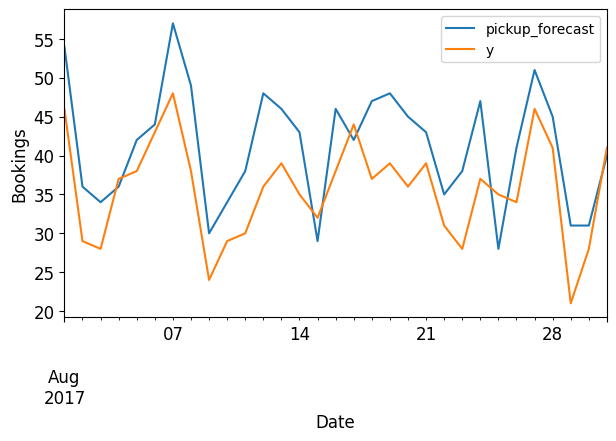

In [43]:
pcikup_forecast = pcikup_forecast.set_index('date')
pcikup_forecast.plot(figsize=(7,4),fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

In [44]:
from sklearn.metrics import mean_absolute_error
print('Time Series: {:.0f}'.format(mean_absolute_error(
            pcikup_forecast[['pickup_forecast']], pcikup_forecast[['y']])))

Time Series: 6


According to my analysis, it is concluded that LSTM achieves the lowest MAE and can be considered the best method for the long-term forecasting task. However, it is worth noting that the pick-up method performs admirably in capturing the underlying trend.

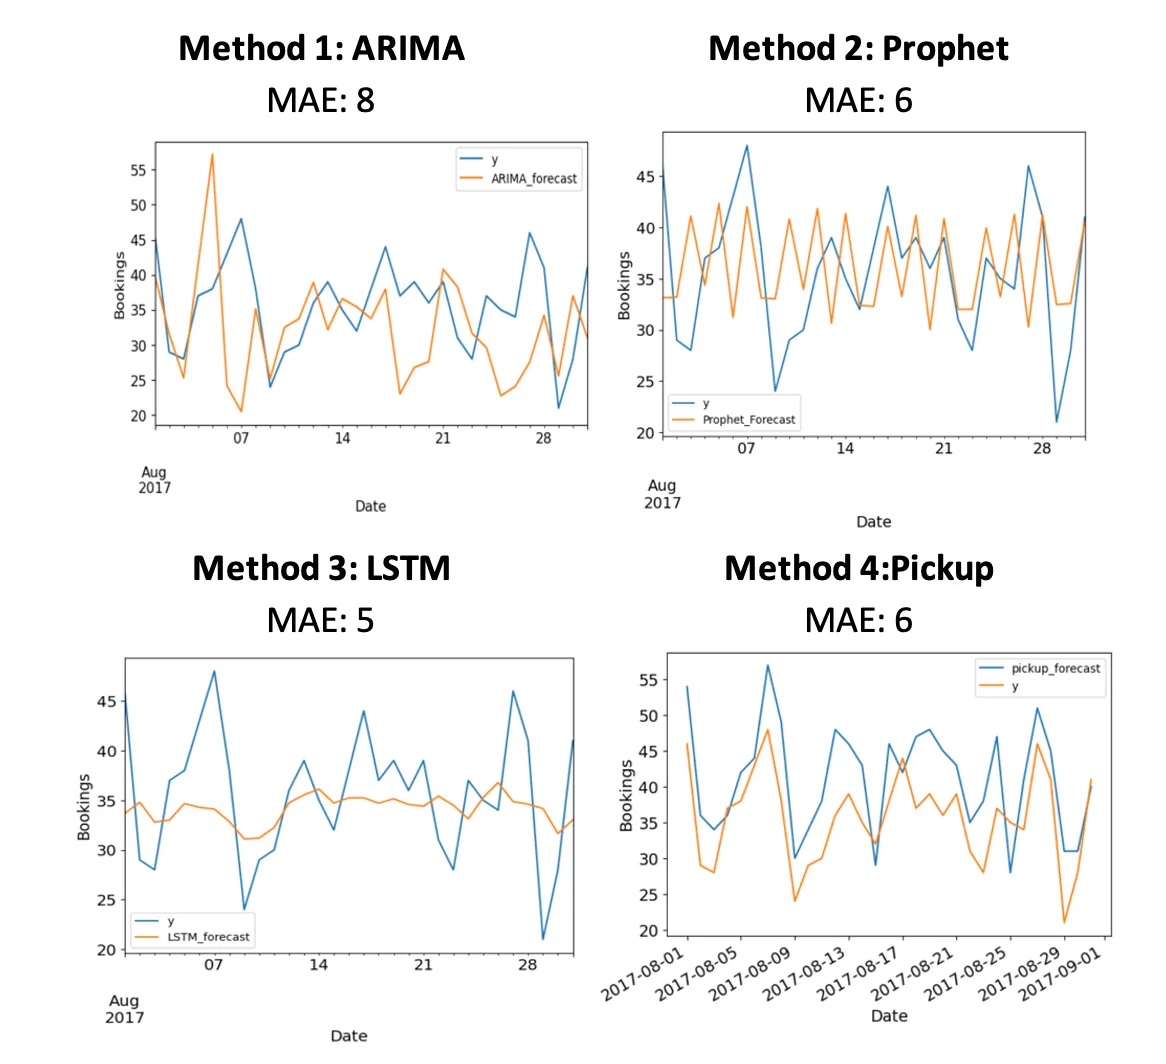

In light of these findings, here are a couple of recommendations to guide a selection of different forecasting methods:

Data pattern: If the data has a clear trend or seasonality, then methods like ARIMA and Prophet may be suitable. If the data is complex and has nonlinear patterns, then deep learning models like LSTMs may be more appropriate.

Short-term vs long-term forecasting: Some methods like pick-up and ARIMA are suited for short-term forecasting, while others like deep learning models may be better for long-term forecasting.